In [1]:
%matplotlib inline
from nrutils import scsearch,gwylm
from matplotlib.pyplot import *
from numpy import array

The highest level init for nrutils is located at: /Users/book/JOKI/Libs/KOALA/nrutils_dev/nrutils/__init__.pyc

>> Initiating nrutils ...

>> Sub-Packages to be imported:
   -> core
   -> manipulate
   -> tools
>> Please note style conventions:                  
   * lower case function/method/variable names                  
   * no underscore in names unless there are repeated letters, or counfounded syllables                  
   * information is implicitely in time domain unless explicitely stated.                  
   * frequency domain information will start with "fd".

nrutils:

  .core: 
      .basics*
      .basics
      .nrsc
  .manipulate: 
      .bundlers
  .tools: 
    .unit: 
      .conversion



In [16]:
A = scsearch(keyword=['sxs'],nonspinning=True,q=2,unique=True,verbose=True)

[scsearch]>> Found keyword (=['sxs']) keyword.
[scsearch]>> Found nonspinning (=True) keyword.
[scsearch]>> Found q (=2) keyword.
[scsearch]>> Found unique (=True) keyword.
[scsearch]>> Found verbose (=True) keyword.
(scsearch)>> List of keywords or string keyword found: ALL scentry objects matching will be passed. To pass ANY entries matching the keywords, input the keywords using an iterable of not of type list.
## Found 1 unique simulations:
[0001][sxs] SXS0169: qc-ns-q2.00



In [17]:
y22 = gwylm(A[0],lm=(2,2),verbose=False)

(gwylm)>> Found clean (=False) keyword.
(gwylm)>> Found lm (=(2, 2)) keyword.
(gwylm)>> Found load (=True) keyword.
(gwylm)>> Found scentry_obj (=<nrutils.core.nrsc.scentry instance at 0x1073ae710>) keyword.
(gwylm)>> Found verbose (=False) keyword.
(**) Warning: No dt given to gwf(). We will assume that the input waveform array is in geometric units, and that dt = 0.275904 will more than suffice.
(**) Warning: No dt given to gwf(). We will assume that the input waveform array is in geometric units, and that dt = 0.275904 will more than suffice.
(load)>> Re-orienting waveform phase to be consistent with internal sign convention for Psi4, where sign(dPhi/dt)=1*sign(m). Note that the internal sign convention is defined in ... nrutils/core/__init__.py as "M_RELATIVE_SIGN_CONVENTION". This message has appeared becuase the waveform is determioned to obey and sign convention: sign(dPhi/dt)=-1*sign(m).


([<matplotlib.axes._subplots.AxesSubplot at 0x10b80dd50>,
 <matplotlib.figure.Figure at 0x108888a50>)

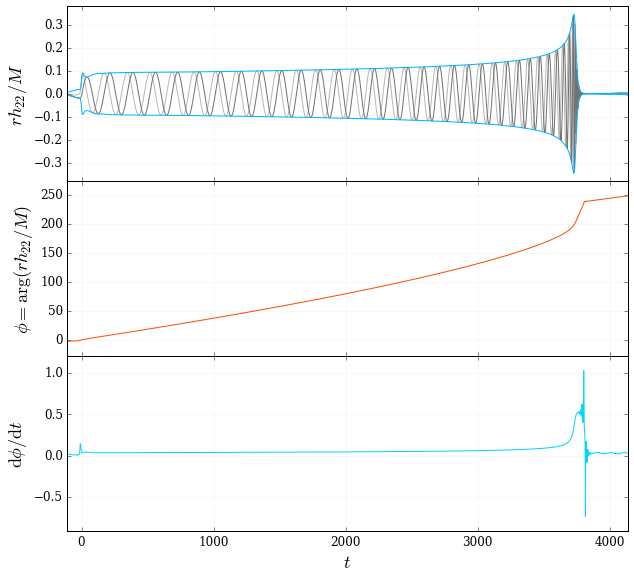

In [18]:
y22.hlm[0].plot()

In [21]:

lm_list = [(2,2),(2,1),(3,3),(4,4)]
y = gwylm(A[0],lm=lm_list,verbose=True,clean=True)

(gwylm)>> Found clean (=True) keyword.
(gwylm)>> Found lm (=[(2, 2), (2, 1), (3, 3), (4, 4)]) keyword.
(gwylm)>> Found load (=True) keyword.
(gwylm)>> Found scentry_obj (=<nrutils.core.nrsc.scentry instance at 0x1073ae710>) keyword.
(gwylm)>> Found verbose (=True) keyword.
(load)>> Loading: rMPsi4_Y_l2_m2.asc
(**) Warning: No dt given to gwf(). We will assume that the input waveform array is in geometric units, and that dt = 0.275904 will more than suffice.
(**) Warning: No dt given to gwf(). We will assume that the input waveform array is in geometric units, and that dt = 0.275904 will more than suffice.
(load)>> Re-orienting waveform phase to be consistent with internal sign convention for Psi4, where sign(dPhi/dt)=1*sign(m). Note that the internal sign convention is defined in ... nrutils/core/__init__.py as "M_RELATIVE_SIGN_CONVENTION". This message has appeared becuase the waveform is determioned to obey and sign convention: sign(dPhi/dt)=-1*sign(m).
(load)>> Loading: rMPsi4_Y_l2_

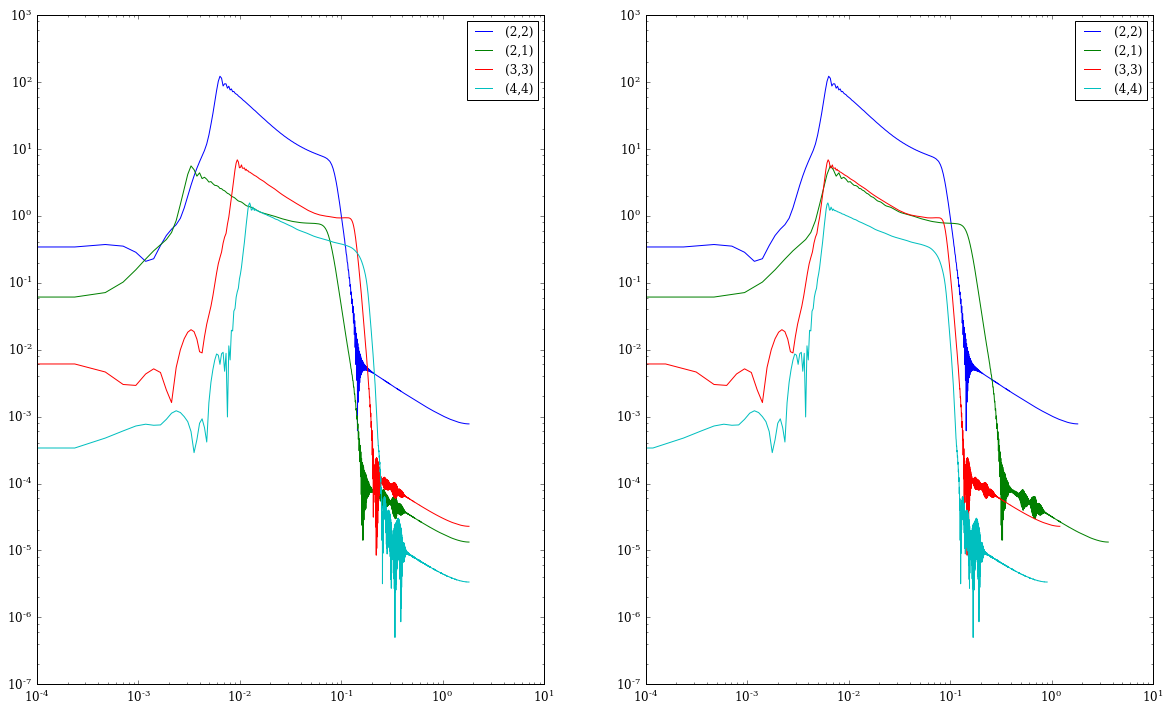

In [24]:
f = y.lm[(2,2)]['strain'].f
a = {}
figure( figsize=4*array([5,3]) )
subplot(1,2,1)
for lm in lm_list:
    a[lm] = y.lm[lm]['strain'].fd_amp
    l,m = lm
    plot( f, a[lm], label = '(%i,%i)'%lm )
    ax = gca()
    ax.set_xscale("log", nonposy='clip')
    ax.set_yscale("log", nonposy='clip')
legend()
subplot(1,2,2)
for lm in lm_list:
    a[lm] = y.lm[lm]['strain'].fd_amp
    l,m = lm
    plot( f*2/m, a[lm], label = '(%i,%i)'%lm )
    ax = gca()
    ax.set_xscale("log", nonposy='clip')
    ax.set_yscale("log", nonposy='clip')

legend()
show()